In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import scanpy as sc

from scverse_plotting_api import plot_umap

plt.rcParams["figure.figsize"] = (3, 2)

In [3]:
adata = sc.datasets.pbmc68k_reduced()

## Automatic

Single simple plot

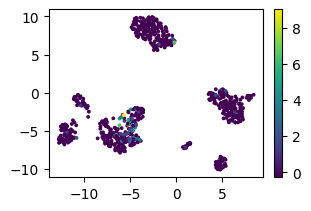

In [4]:
plot_umap(adata, color=["CD8A"])

Multiple plots with shared color, squareish figure

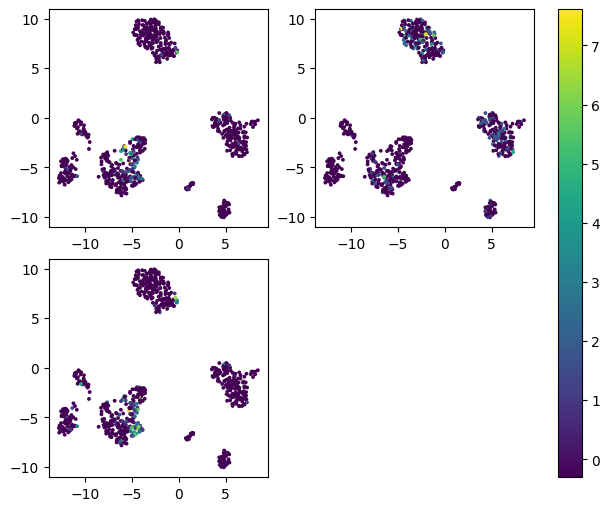

In [5]:
with plt.rc_context({"figure.figsize": (6, 5)}):
    fig = plot_umap(adata, color=["CD8A", "CD4", "CD8B"])
fig  # TODO: allow auto-displaying in with block

Same but wide figure

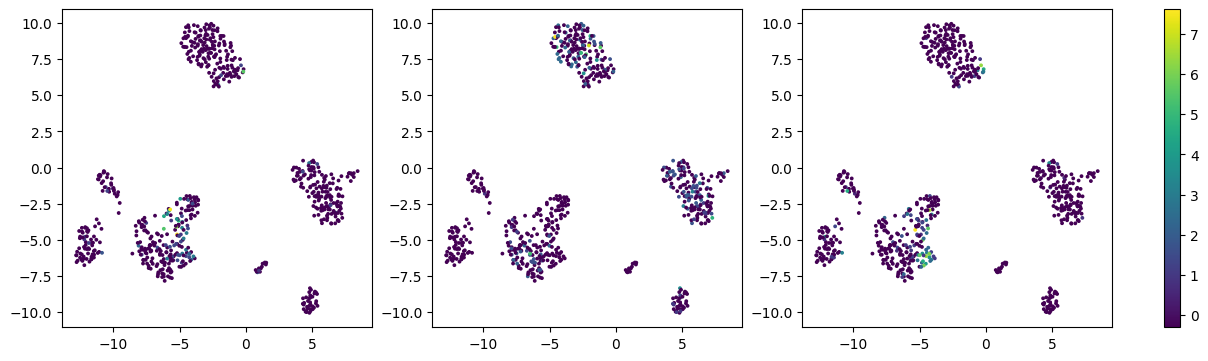

In [6]:
with plt.rc_context({"figure.figsize": (12, 3.5)}):
    fig = plot_umap(adata, color=["CD8A", "CD4", "CD8B"])
fig  # TODO: allow auto-displaying in with block

## Manually plot into `Axes` objects

Individually plot individual plots into a subplot `Axes` object each.

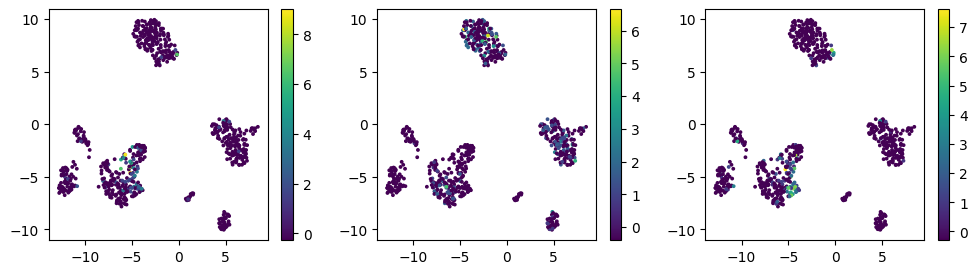

In [7]:
with plt.ioff():
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3))
plot_umap(adata, color=["CD8A"], ax=ax0)
plot_umap(adata, color=["CD4"], ax=ax1)
plot_umap(adata, color=["CD8B"], ax=ax2)
fig

## Manually plot into `GridSpec`

Reuse whole `GridSpec` with sufficient vacant slots

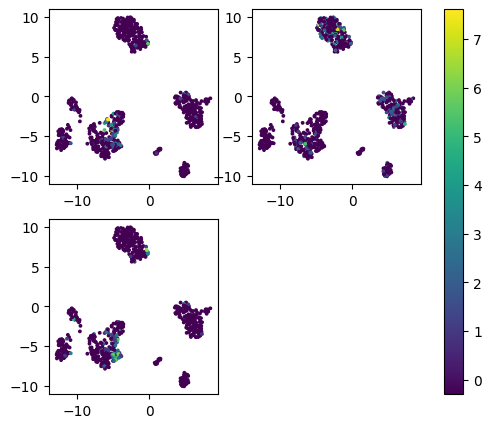

In [8]:
fig = plt.Figure(figsize=(6, 5))
gs = plt.GridSpec(2, 2, fig)
plot_umap(adata, color=["CD8A", "CD4", "CD8B"], ax=gs)
fig

Reuse `SubPlotSpec`s (`gs[a:b]`) with sufficient vacant slots

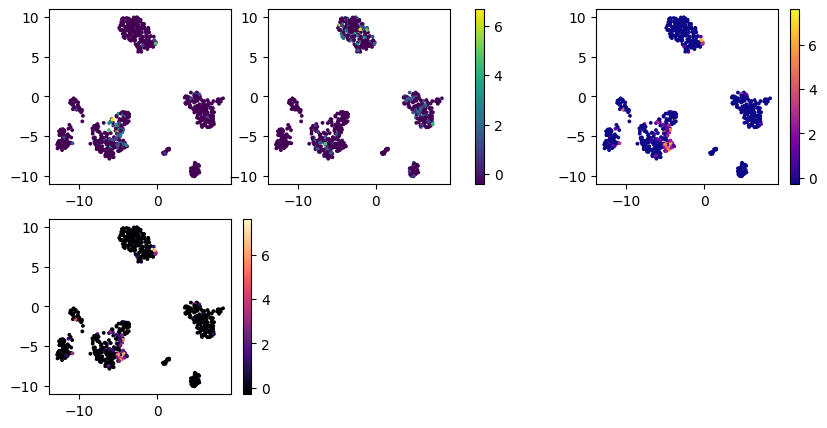

In [17]:
fig = plt.Figure(figsize=(10, 5))
gs = plt.GridSpec(2, 3, fig)
# use two slots to plot two
plot_umap(adata, color=["CD8A", "CD4"], ax=gs[0, :2])
# use single slot
with plt.rc_context({"image.cmap": "magma"}):
    plot_umap(adata, color=["CD8B"], ax=gs[1, 0])
# use multiple slots to plot one
with plt.rc_context({"image.cmap": "plasma"}):
    plot_umap(adata, color=["CD8B"], ax=gs[0:2, 2])
fig